In [18]:
import os
import tensorflow as tf
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Activation
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras.initializers import RandomUniform
from keras.initializers import Constant
from keras.models import load_model
from keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt

MODELS_DIR = os.path.abspath("C:/Projects/tensorflow/models")
MODEL_FILE_PATH = os.path.join(MODELS_DIR, "mnist_model.h5")
FULL_MODEL_FILE_PATH = os.path.join(MODELS_DIR, "full_mnist_model")
LOGS_DIR = os.path.abspath("C:/Projects/tensorflow/logs")
MODEL_LOGS_DIR = os.path.join(LOGS_DIR, "mnist_logs")

Preprocessing

In [19]:
def get_dataset(num_features: int, num_classes) -> tuple[tuple[np.ndarray, np.ndarray], tuple[np.ndarray, np.ndarray]]:
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print (f"x shape: {x_train.shape}   y shape: {y_train.shape}")
    x_train = x_train.reshape(-1, num_features).astype(np.float32)
    x_test = x_test.reshape(-1, num_features).astype(np.float32)
    y_train = to_categorical(y_train, num_classes=num_classes, dtype=np.float32)
    y_test = to_categorical(y_test, num_classes=num_classes, dtype=np.float32)
    return (x_train, y_train), (x_test, y_test)


In [20]:
def build_model(num_features, num_classes) -> Sequential:
    init_w = RandomUniform(minval=-0.05, maxval=0.05)
    init_b = Constant(value=0.0)
    model = Sequential()
    model.add(Dense(units=256, input_shape=(num_features,),
                    kernel_initializer=init_w, bias_initializer=init_b))
    model.add(Activation("relu"))
    model.add(Dense(units=128, input_shape=(num_features,),
                    kernel_initializer=init_w, bias_initializer=init_b))
    model.add(Activation("relu"))
    model.add(Dense(units=64, input_shape=(num_features,),
                    kernel_initializer=init_w, bias_initializer=init_b))
    model.add(Activation("relu"))
    model.add(Dense(units=num_classes))
    model.add(Activation("softmax"))
    return model

Train the Model

In [21]:
num_features = 784
num_classes = 10
(x_train, y_train), (x_test, y_test) = get_dataset(num_features, num_classes)

model = build_model(num_features=num_features, num_classes=num_classes)

model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

tb_callback = TensorBoard(
    log_dir=MODEL_LOGS_DIR, histogram_freq=1, write_graph=True
)

history = model.fit (x=x_train, 
           y=y_train, 
           epochs=10, 
           batch_size=128, 
           verbose=1, 
           validation_data=(x_test, y_test),
           callbacks=[tb_callback])


x shape: (60000, 28, 28)   y shape: (60000,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 activation_8 (Activation)   (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 activation_9 (Activation)   (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 activation_10 (Activation)  (None, 64)                0         
                                                                 
 dense_11

c:\Users\yann.MSI\anaconda3\envs\data_science\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


469/469 [==============================] - 2s 3ms/step - loss: 0.2922 - accuracy: 0.9173 - val_loss: 0.1625 - val_accuracy: 0.9532
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1147 - accuracy: 0.9652 - val_loss: 0.1107 - val_accuracy: 0.9670
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0898 - accuracy: 0.9724 - val_loss: 0.1193 - val_accuracy: 0.9663
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0748 - accuracy: 0.9770 - val_loss: 0.1069 - val_accuracy: 0.9692
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0638 - accuracy: 0.9801 - val_loss: 0.0963 - val_accuracy: 0.9741
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0603 - accuracy: 0.9817 - val_loss: 0.1100 - val_accuracy: 0.9714
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0487 - accuracy: 0.9847 - val_loss: 0.0986 - val_accuracy: 0.9748
Epoch 8/10
469/46

Plot Accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.1157 - accuracy: 0.9726
Score: [0.11573145538568497, 0.972599983215332]


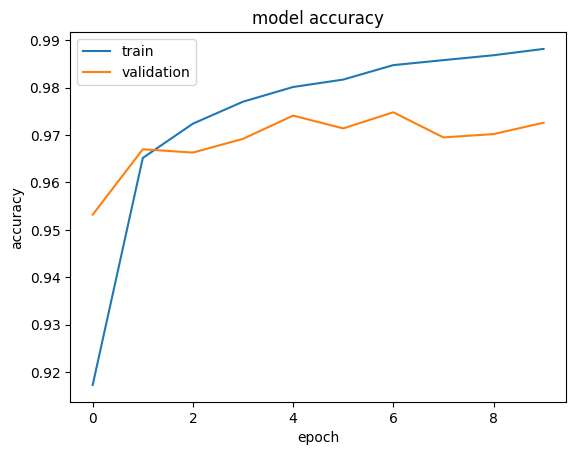

In [22]:
scores = model.evaluate(x=x_test, y=y_test)
print(f"Score: {scores}")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Download Model/Weights

In [23]:
#weights
model.save_weights(filepath=MODEL_FILE_PATH)
model.save(filepath=FULL_MODEL_FILE_PATH)

INFO:tensorflow:Assets written to: C:\Projects\tensorflow\models\full_mnist_model\assets


Load Model/Weights

In [24]:
model.load_weights(filepath=MODEL_FILE_PATH)
model = load_model(filepath=FULL_MODEL_FILE_PATH)

c:\Users\yann.MSI\anaconda3\envs\data_science\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
